# 과제 1

- 제출자: 20기 황태연
- 제출 일자: 2023.08.01. (화)

## Matrix 구현 
1. Linear Regression에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해주세요.
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해주세요.

### Data Load 

In [1]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [2]:
data.head() # data의 앞 5행을 확인합니다.

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [3]:
data.shape     # y:(9,1), X:(9,5)

(9, 6)

In [4]:
X = data.drop(["y"], axis=1) # 정답에 해당하는 y의 열을 drop(제거)합니다.
y = data.y # y열만을 저장합니다.

In [5]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다. 
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [7]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

In [8]:
import numpy as np
from numpy.linalg import inv # inv: matrix의 역행렬을 구하는 함수

- **Least Squares Estimator(최소제곱 추정치)**
: 정답 $y$와 예측 $\hat{y} = X\beta$에 대하여 최소제곱 추정치 $\beta$는 다음과 같이 구해진다.
$$
\epsilon = y - X\beta = (\epsilon_1; \epsilon_2; \cdots; \epsilon_n)\\
\begin{align*}
    \Rightarrow \sum \epsilon_i^2 &= \epsilon^T \epsilon \\
    &= (y-X\beta)^T(y-X\beta) \\
    &= y^T y + \beta^T X^T X \beta - 2\beta^T X^T y \\
    \frac{\partial\epsilon}{\partial\beta} & = 2X^T X \beta - 2X^T y \\
    &\Rightarrow X^T X \beta = X^T y \\
    &\Rightarrow \beta = (X^T X)^{-1}X^T y
\end{align*}
$$

In [11]:
def estimate_beta(X, y):
    # bias(beta_0)를 만들기 위해 X를 다음과 같이 조정한다.
    # 즉, X 데이터 행렬 맨 앞에 1이라는 bias 항을 추가한다.
    designX = np.hstack((np.ones((X.shape[0], 1)), X)) # hstack: 배열 여러 개를 수평 방향으로 결합한다. (A, B)
    beta_hat = np.matmul(inv(np.matmul(designX.T, designX)), np.matmul(designX.T, y)) # 위 식을 참고하라.
    
    return beta_hat

In [12]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X, y) # 모델 학습

pred = model.predict(X) # 학습된 모델의 예측

In [15]:
print(model.intercept_)   # intercept (bias 출력)
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

-39.24473678135658
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


### 2. MSE

- **SSE(Sum of Squared Error, 잔차제곱합)**
: $n$을 데이터의 개수, $y$를 정답 레이블, $\hat{y}$를 예측 레이블이라 할 때
$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **MSE(Mean Squared Error, 평균제곱오차)**
: $p$를 설명변수(독립변수)의 개수라 할 때
$$
MSE = \frac{SSE}{n-(p+1)}
$$

In [51]:
def MSE(X, y, beta_hat):
    designX = np.hstack((np.ones((X.shape[0], 1)), X)) # 이전과 같이 편향 부분을 추가
    y_pred = np.matmul(designX, beta_hat) # 예측 결과는 y_hat = X*beta_hat이다. 이때 beta_hat는 1xn 이므로 transpose한다.(필수X)
    mse = np.sum((y-y_pred)**2) / (X.shape[0]-(X.shape[1]+1))
        # 여기에서는 designX 대신 X를 사용해야 함에 유의해야 한다.
        # X의 열이 설명변수를 의미하기 때문이다. designX에는 편향이 포함되어 있다.
    return mse

In [52]:
MSE(X, y, estimate_beta(X, y))

4.846793168705763

# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

- 제출자: 20기 황태연
- 제출 일자: 2023.08.01. (화)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') # 경고문을 무시한다.

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 0. 전처리

## 0.1. 결측치 제거

- 데이터의 여러 정보들을 확인합니다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


- 'Unnamed: 0'은 단순히 index만을 나타내주므로 제거합니다.
- 또한 New_Price에는 너무 많은 데이터가 결측치로 관찰되므로 분석 대상에서 제외합니다.

In [5]:
data = data.drop(['Unnamed: 0', 'New_Price'], axis=1)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


- 결측치도 모두 제거해줍니다.

In [6]:
data = data.dropna(how = 'any') # 행에 하나라도 결측치가 있으면 그 행은 제거합니다.
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## 0.2. 단위 제거

- Mileage, Engine, Power에는 수치형 변수이지만 단위가 함께 적혀 있습니다. 이를 수치형 변수로 다룰 수 있도록 처리해야 합니다.
- 먼저, 각 열에 존재하는 단위가 하나뿐인지 조사해봅시다.

In [7]:
unit = data[['Mileage', 'Engine', 'Power']].copy()
for col in unit.columns:
    unit[col] = unit[col].str.split().str[1]
unit

,Mileage,Engine,Power
0,km/kg,CC,bhp
1,kmpl,CC,bhp
2,kmpl,CC,bhp
3,kmpl,CC,bhp
4,kmpl,CC,bhp
...,...,...,...
6014,kmpl,CC,bhp
6015,kmpl,CC,bhp
6016,kmpl,CC,bhp
6017,kmpl,CC,bhp


In [8]:
unit.value_counts()

Mileage  Engine  Power
kmpl     CC      bhp      5909
km/kg    CC      bhp        66
dtype: int64

- 위 내용에 따르면 Engine과 Power 각각에 존재하는 단위는 하나뿐이지만, Mileage의 단우니는 'kmpl'과 'km/kg'로 2개입니다.
- 'km/kg' 단위를 갖는 행의 개수는 66개이므로, 해당 행을 데이터에서 제거하여 전처리하겠습니다.

In [9]:
# unit DataFrame의 'Mileage 열에서 'km/kg'라는 원소가 있는 행의 인덱스 추출
rows = unit.index[unit['Mileage'] == 'km/kg']

# 해당 인덱스를 data DataFrame에서 제거
data = data.drop(rows)

In [10]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


- 이제 단위를 제거하겠습니다.

In [11]:
for col in ['Mileage', 'Engine', 'Power']:
    data[col] = data[col].str.split().str[0]
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5909 non-null   object 
 1   Location           5909 non-null   object 
 2   Year               5909 non-null   int64  
 3   Kilometers_Driven  5909 non-null   int64  
 4   Fuel_Type          5909 non-null   object 
 5   Transmission       5909 non-null   object 
 6   Owner_Type         5909 non-null   object 
 7   Mileage            5909 non-null   object 
 8   Engine             5909 non-null   object 
 9   Power              5909 non-null   object 
 10  Seats              5909 non-null   float64
 11  Price              5909 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 600.1+ KB


- 마지막으로 'Mileage', 'Engine', 'Power' 데이터 타입을 float64로 변경합니다.

- 바로 형변환을 하려고 시도하면 경고문을 통해 'null'이라는 데이터가 있음을 확인할 수 있습니다.
- 'null'을 제거한 뒤 다시 float으로 형변환합니다.

In [13]:
# 'null' 문자열을 NaN으로 변환
data.replace('null', pd.NA, inplace=True)

# NaN을 가진 행 삭제
data = data.dropna()

In [14]:
data[['Mileage', 'Engine', 'Power']] = data[['Mileage', 'Engine', 'Power']].astype(float)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


## 0.3. One-hot Encoding of Categorical Variables

- Categorical 변수를 분석하기 위해서는 One-hot Encoding해야 합니다.
- 주어진 데이터에서 Categorical 변수는 'Location', 'Fuel_type', 'Transmission', 'Owner_Type'입니다.

In [15]:
data['Location'].value_counts()

Mumbai        757
Hyderabad     709
Kochi         637
Coimbatore    629
Pune          581
Delhi         535
Kolkata       521
Chennai       474
Jaipur        400
Bangalore     347
Ahmedabad     217
Name: Location, dtype: int64

In [16]:
data['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
Name: Fuel_Type, dtype: int64

In [17]:
data['Transmission'].value_counts()

Manual       4105
Automatic    1702
Name: Transmission, dtype: int64

In [18]:
data['Owner_Type'].value_counts()

First             4786
Second             913
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

- 이제 위 4개의 열을 One-hot Encoding하겠습니다.

In [19]:
for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)
    data = data.drop([col], axis=1)
data

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,...,Mumbai,Pune,Diesel,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,1,1,0,0,1,1,0,0,0
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,...,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,...,0,0,1,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,1,0,1,0,0,0,1,0
6,Nissan Micra Diesel XV,2013,86999,23.08,1461.0,63.10,5.0,3.50,0,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,...,0,0,1,0,0,1,1,0,0,0
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,...,0,0,1,0,0,1,1,0,0,0
6016,Mahindra Xylo D4 BSIV,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,...,0,0,1,0,0,1,0,0,1,0
6017,Maruti Wagon R VXI,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,...,0,0,0,1,0,1,1,0,0,0


## 0.4. 이상치 제거

- 회귀분석 단계에서 이상치 제거를 수행하겠습니다.

# 1. 회귀분석

- 먼저, 수치형 데이터를 정규화하겠습니다.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data = data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].copy()

norm_data = pd.DataFrame(scaler.fit_transform(norm_data), columns = norm_data.columns)

norm_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,0.480751,-0.187258,0.341185,-0.082821,0.229548,-0.355205,0.250338
1,-0.780901,-0.133290,-0.001599,-0.719276,-0.466200,-0.355205,-0.458189
2,-0.465488,0.309247,0.597689,-0.637850,-0.465087,2.123970,-0.325340
3,-0.150075,-0.190820,-0.701156,0.558619,0.500426,-0.355205,0.714422
4,-0.150075,0.309236,1.136348,-0.283894,-0.941164,-0.355205,-0.546755
...,...,...,...,...,...,...,...
5802,0.165338,-0.334429,2.376897,-0.637850,-0.738933,-0.355205,-0.436047
5803,0.480751,0.449564,1.444154,-0.850555,-0.794593,-0.355205,-0.502472
5804,-0.465488,-0.036148,-0.980979,1.439353,-0.033909,3.363557,-0.599894
5805,-0.150075,-0.133290,0.161631,-1.053290,-0.866950,-0.355205,-0.622036


- 이상치를 제거합니다.

In [105]:
def outlier_IQR(df, scale=1.5):
    """
    input: DataFrame
    output: Q1 - 1.5IQR보다 작거나 Q3 + 1.5IQR보다 크면 이상치로 판단하여 True를, 그렇지 않으면 False를 반환
    """
    Q1 = df.quantile(0.25, numeric_only=True) # 제1사분위수
    Q3 = df.quantile(0.75, numeric_only=True) # 제3사분위수
    IQR = Q3-Q1 # 사분위수 범위

    return (df < Q1 - scale*IQR) | (df > Q3 + scale*IQR)

def remove_outliers(df, scale=1.5):
    """
    input
    - DataFrame: 이상치 제거의 대상이 되는 DataFrame
    - scale(IQR 계산 시 기준을 1.5가 아닌 다른 숫자로 설정할 수도 있다.)
    output: IQR로 발견한 이상치가 제거된 DataFrame
    """
    outliers = outlier_IQR(df, scale) # 이상치는 True, 그렇지 않으면 False
    remove_rows = outliers.index[outliers.any(axis=1)] # True 원소를 가진 행 번호를 모두 추출
    removed_df = df.drop(index=remove_rows) # 이상치를 갖는 모든 행 제거
    return removed_df

removed_norm_data = remove_outliers(norm_data, 3.0)
removed_norm_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,0.480751,-0.187258,0.341185,-0.082821,0.229548,-0.355205,0.250338
1,-0.780901,-0.133290,-0.001599,-0.719276,-0.466200,-0.355205,-0.458189
3,-0.150075,-0.190820,-0.701156,0.558619,0.500426,-0.355205,0.714422
4,-0.150075,0.309236,1.136348,-0.283894,-0.941164,-0.355205,-0.546755
6,-0.150075,0.065636,0.544056,-0.056233,-0.189756,-0.355205,-0.396193
...,...,...,...,...,...,...,...
5801,0.480751,0.132254,1.770614,-0.222409,-0.282522,-0.355205,-0.428962
5802,0.165338,-0.334429,2.376897,-0.637850,-0.738933,-0.355205,-0.436047
5803,0.480751,0.449564,1.444154,-0.850555,-0.794593,-0.355205,-0.502472
5805,-0.150075,-0.133290,0.161631,-1.053290,-0.866950,-0.355205,-0.622036


- 이제 train & test data로 분리하겠습니다.

In [108]:
from sklearn.model_selection import train_test_split

X = removed_norm_data.drop('Price', axis=1)
y = removed_norm_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [109]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4146, 6) (461, 6) (4146,) (461,)


- 수치형 변수만을 이용해서 선형회귀분석을 진행합니다.
- 과제1을 참고합니다.

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # 모델 학습

pred = model.predict(X_test) # 학습된 모델의 예측

In [111]:
import numpy as np
from numpy.linalg import inv

def estimate_beta(X, y):
    designX = np.hstack((np.ones((X.shape[0], 1)), X))
    beta_hat = np.matmul(inv(np.matmul(designX.T, designX)), np.matmul(designX.T, y))
    return beta_hat

In [112]:
def MSE(X, y, beta_hat):
    designX = np.hstack((np.ones((X.shape[0], 1)), X))
    y_pred = np.matmul(designX, beta_hat)
    mse = np.sum((y-y_pred)**2) / (X.shape[0]-(X.shape[1]+1))
    return mse

In [119]:
MSE(X_test, y_test, estimate_beta(X_test, y_test))

0.08801873159471833

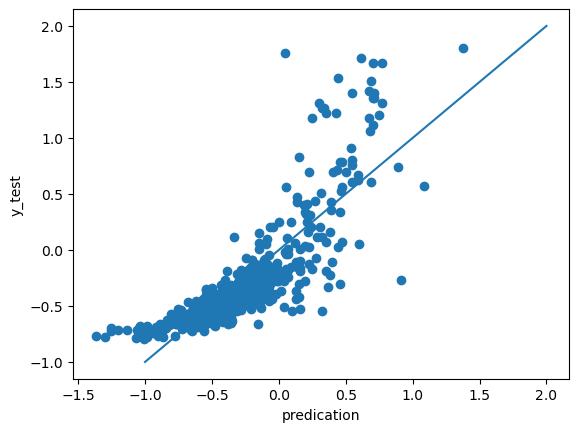

In [116]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 2, 100)
plt.scatter(pred, y_test)
plt.plot(x, x)

plt.xlabel('predication')
plt.ylabel('y_test')

plt.show()

- $y=x$ 그래프에 가까울수록 예측을 잘 했다고 볼 수 있다.

# 2. 회귀진단

## 2.1. 선형성

- 산점도를 통해 선형성을 파악해보자.

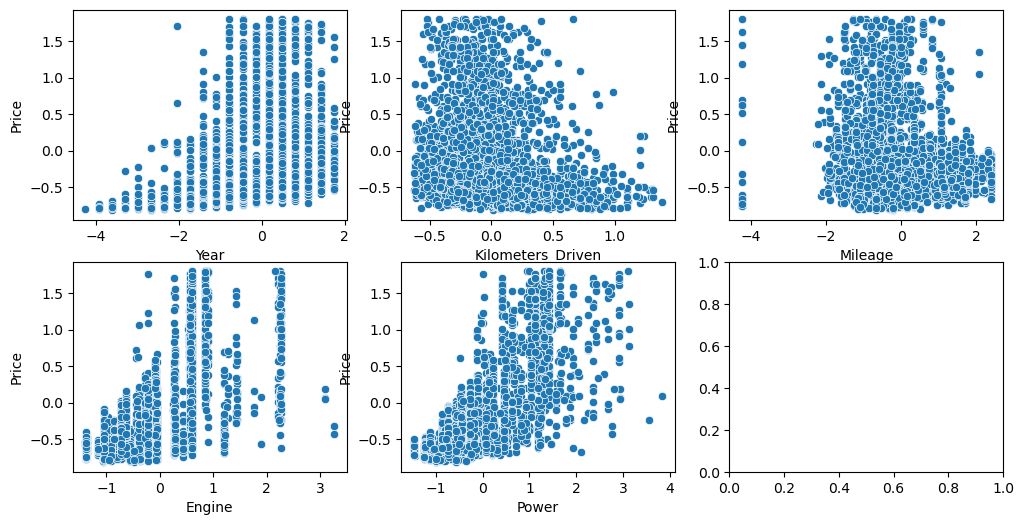

In [125]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i, col in enumerate(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']):
    r = i // 3
    c = i % 3
    sns.scatterplot(data=removed_norm_data, x=col, y='Price', ax=axes[r, c])
    axes[r, c].set_xlabel(col)
    axes[r, c].set_ylabel('Price')

- 위의 산점도를 통해 'Year'과 'Power'는 선형 관계가 어느정도 있다는 사실을 알 수 있지만, 다른 변수들은 그렇지 않다.

## 2.2. 정규성

- 잔차의 정규성을 히스토그램으로 파악해보자.

<AxesSubplot:xlabel='Price', ylabel='Count'>

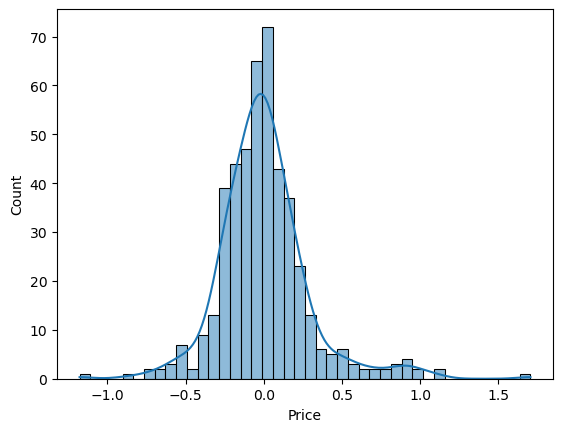

In [126]:
sns.histplot(y_test - pred, kde=True)

- 잔차는 정규분포 형태를 보이므로, 정규성을 만족한다고 파악할 수 있다.

## 2.3. 다중공선성

- **다중공선성(Multicollinearity)**: 독립변수들 간에 강한 상관관계가 나타나는 문제. 이 문제가 발생하면 독립변수 간의 독립성을 위배하게 되어 모델의 신뢰도를 낮추게 된다.
- **다중공선성 진단통계량(VIF, Variance Information Factor)**
$$
VIF_i = \frac{1}{1-R_i^2}
$$
($R_i^2$: $i$번째 변수를 제외한 모델의 결정계수)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공산성 계산을 제공하는 라이브러리

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    removed_norm_data.values, i) for i in range(removed_norm_data.shape[1])]
vif["features"] = removed_norm_data.columns
vif

,VIF Factor,features
0,2.065518,Year
1,1.459159,Kilometers_Driven
2,1.649565,Mileage
3,6.793078,Engine
4,8.204500,Power
5,1.502245,Seats
6,3.195172,Price


- 모든 수치형 변수의 VIF Factor가 10 이하이므로, 모두 사용 가능한 변수이다.

- 위 결과를 종합해서 변수를 일부 택하여 회귀모형을 만들 수 있다.

**[참고 자료]**
1. 다중공선성: https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html#:~:text=%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1(multicollinearity)%EB%9E%80,%ED%95%9C%EB%8B%A4%EB%8A%94%20%EC%A1%B0%EA%B1%B4%EC%9D%84%20%EC%B9%A8%ED%95%B4%ED%95%9C%EB%8B%A4.

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

- 제출자: 20기 황태연
- 제출 일자: 2023.08.01. (화)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 0. 전처리

- 먼저 데이터의 여러 정보를 확인합니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


- 결측치가 따로 없음을 확인할 수 있습니다.

- 이상치 제거를 시도하려고 했으나, 이상치에 사기(1)로 분류되는 데이터가 많았습니다. 따라서 이상치 제거를 하지 않습니다.

- 훈련 데이터와 테스트 데이터를 분리합니다.

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25810, 28) (2868, 28) (25810,) (2868,)


- 이제 데이터가 모두 준비되었습니다.

# 1. 로지스틱 회귀분석

- sklearn 라이브러리를 이용해서 로지스틱 회귀분석을 진행합니다.

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # 모델로 로지스틱 회귀 모형을 사용합니다.
model.fit(X_train, y_train) # 주어진 데이터로 모델을 학습시킵니다.

y_pred = model.predict(X_test) # Test dataset에 대하여 모델로 예측합니다.

In [28]:
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
y_test[0:100].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- 앞의 100개의 데이터를 확인해보면, 예측에서는 다음과 같은 결과가 나타났습니다.
    - 정답 0을 올바르게 0으로 예측한 개수: 97 (TP)
    - 정답 1을 올바르게 1로 예측한 개수: 2 (TN)
    - 정답 0을 올바르지 않게 1로 예측한 개수: 1 (FP)
    - 정답 1을 올바르지 않게 0으로 예측한 개수: 0 (FN)
    - 정답률: 99%

# 2. 성능지표

## 2.1. Accuracy(정확도)

- 모델의 정확도를 확인해봅시다.

In [34]:
n = len(y_test)
count = 0
for i, j in zip(y_test, y_pred):
    if i == j:
        count += 1
accuracy = count / n

print("Accuracy:", accuracy)

Accuracy: 0.9954672245467224


- 정답률은 약 99.547%입니다.

## 2.2. Precision(정밀도), Recall(재현율), F1 Score

- 혼동행렬(Confusion matrix, TP, FN, FP, TN을 나타낸 행렬)을 통해 Precision, Recall, F1 Score를 모두 구해봅시다.
- sklearn에서는 confusion_matrix 함수를 제공하고 있으나, 여기에서는 직접 TP, FN, FP, TN을 모두 구할 것입니다.

In [35]:
n = len(y_test)
tp = 0
fn = 0
fp = 0
tn = 0
for i, j in zip(y_test, y_pred):
    if i == 1 and j == 1:
        tp += 1
    elif i == 1 and j == 0:
        fn += 1
    elif i == 0 and j == 1:
        fp += 1
    else:
        tn += 1
        
print('total:', n)
print('tp:', tp)
print('fn:', fn)
print('fp:', fp)
print('tn:', tn)

total: 2868
tp: 25
fn: 11
fp: 2
tn: 2830


In [36]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(1/((1/precision)+(1/recall)))

print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)

Precision: 0.9259259259259259
Recall: 0.6944444444444444
f1: 0.7936507936507936


- 정확도는 매우 높은 편이었으나, 정밀도와 재현율, 그리고 f1 score는 상대적으로 낮습니다.
- 이는 데이터에 0이 매우 많기 때문에 발생한 문제입니다.
- 따라서 정밀도와 재현율을 모두 반영하는 **f1 score**를 향상시키는 방향으로 성능 개선을 시도해보겠습니다.

# 3. 성능 개선

- Logistic Regression 모델을 그대로 가져가면서 성능을 개선시키기 위한 방법은 **Cutoff를 조정**하는 것입니다.
- **Cutoff**: 분류를 위한 기준으로, 1일 확률을 cutoff 이상이라고 판단하면 1이라고 판단하고, 그렇지 않으면 0이라고 판단합니다.
- 기본적으로 Logistic Regression 모델에서는 cutoff가 0.5이므로, 이 수치를 조절하여 성능을 개선하겠습니다.

- 다음은 위의 모델이 0이라고 예측할 확률과 1이라고 예측할 확률을 보여주고 있습니다. (왼쪽: 0, 오른쪽: 1)

In [40]:
score = model.predict_proba(X_test)
score

array([[9.99882929e-01, 1.17070788e-04],
       [9.99086175e-01, 9.13825081e-04],
       [9.99408064e-01, 5.91935576e-04],
       ...,
       [9.99858983e-01, 1.41016618e-04],
       [9.99829610e-01, 1.70389882e-04],
       [9.98788715e-01, 1.21128465e-03]])

- 이를 이용해서 cutoff를 조절해봅시다.

In [54]:
def f1_score(model, X_test, y_test, cutoff):
    score = model.predict_proba(X_test)
    n = len(y_test)
    y_pred = np.zeros(n)
    for idx, (i, j) in enumerate(score):
        if j >= cutoff:
            y_pred[idx] = 1
    
    tp, fn, fp, tn = 0, 0, 0, 0
    for i, j in zip(y_test, y_pred):
        if i == 1 and j == 1:
            tp += 1
        elif i == 1 and j == 0:
            fn += 1
        elif i == 0 and j == 1:
            fp += 1
        else:
            tn += 1
            
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*(1/((1/precision)+(1/recall)))
    
    return f1

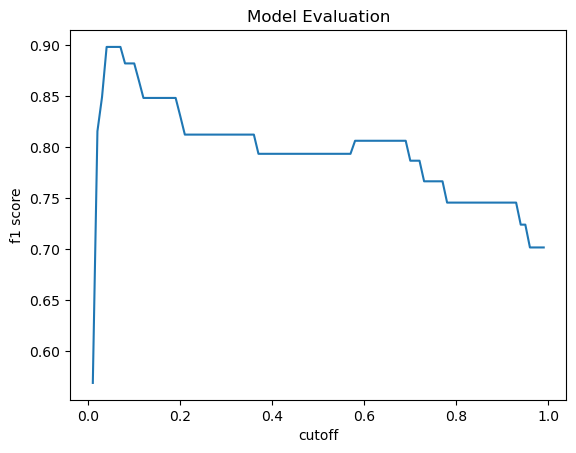

In [57]:
cutoff_list = np.linspace(0.01, 0.99, 99)
f1_list = []
for cutoff in cutoff_list:
    f1 = f1_score(model, X_test, y_test, cutoff)
    f1_list.append(f1)

plt.plot(cutoff_list, f1_list)
plt.xlabel("cutoff")
plt.ylabel("f1 score")
plt.title("Model Evaluation")
plt.show()

In [62]:
print('최적의 cutoff:', cutoff_list[np.argmax(f1_list)])

최적의 cutoff: 0.04


In [63]:
print('최적의 f1 score:', np.max(f1_list))

최적의 f1 score: 0.8985507246376813


- 따라서 cutoff를 0.04로 했을 때 가장 높은 f1 score인 0.89855를 얻을 수 있음을 확인했다.